In [133]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import json
from datetime import datetime

In [134]:
f = open('data/data/tweet.js', encoding="utf-8")
tweets = json.load(f)
n_tweets = len(tweets)
data = pd.DataFrame()
for j in range(n_tweets):
    data.loc[j, 'Date'] = datetime.strptime(tweets[j]['tweet']['created_at'],'%a %b %d %X %z %Y')
    data.loc[j, 'retweeted'] = bool(tweets[j]['tweet']['retweeted'])
    data.loc[j,'favorite_count'] = int(tweets[j]['tweet']['favorite_count'])
    data.loc[j,'Tweet'] = tweets[j]['tweet']['full_text']

In [135]:
initial_date = datetime(2011, 1, 1)
final_date = datetime(2022, 6, 30)
total_time_series = pd.DataFrame(index=pd.date_range(initial_date, final_date))
n_window = 60

In [136]:
for date_reference in total_time_series.index:
    window_left = date_reference.date() - pd.Timedelta(n_window, 'days')
    window_right = date_reference.date()
    window = (pd.to_datetime(data['Date']).dt.date > window_left) & (pd.to_datetime(data['Date']).dt.date <= window_right)
    total_time_series.loc[date_reference, 'Tweets'] = float(data[window]['retweeted'].count() / n_window)
    total_time_series.loc[date_reference, 'Likes'] = float(data[window]['favorite_count'].sum() / n_window)

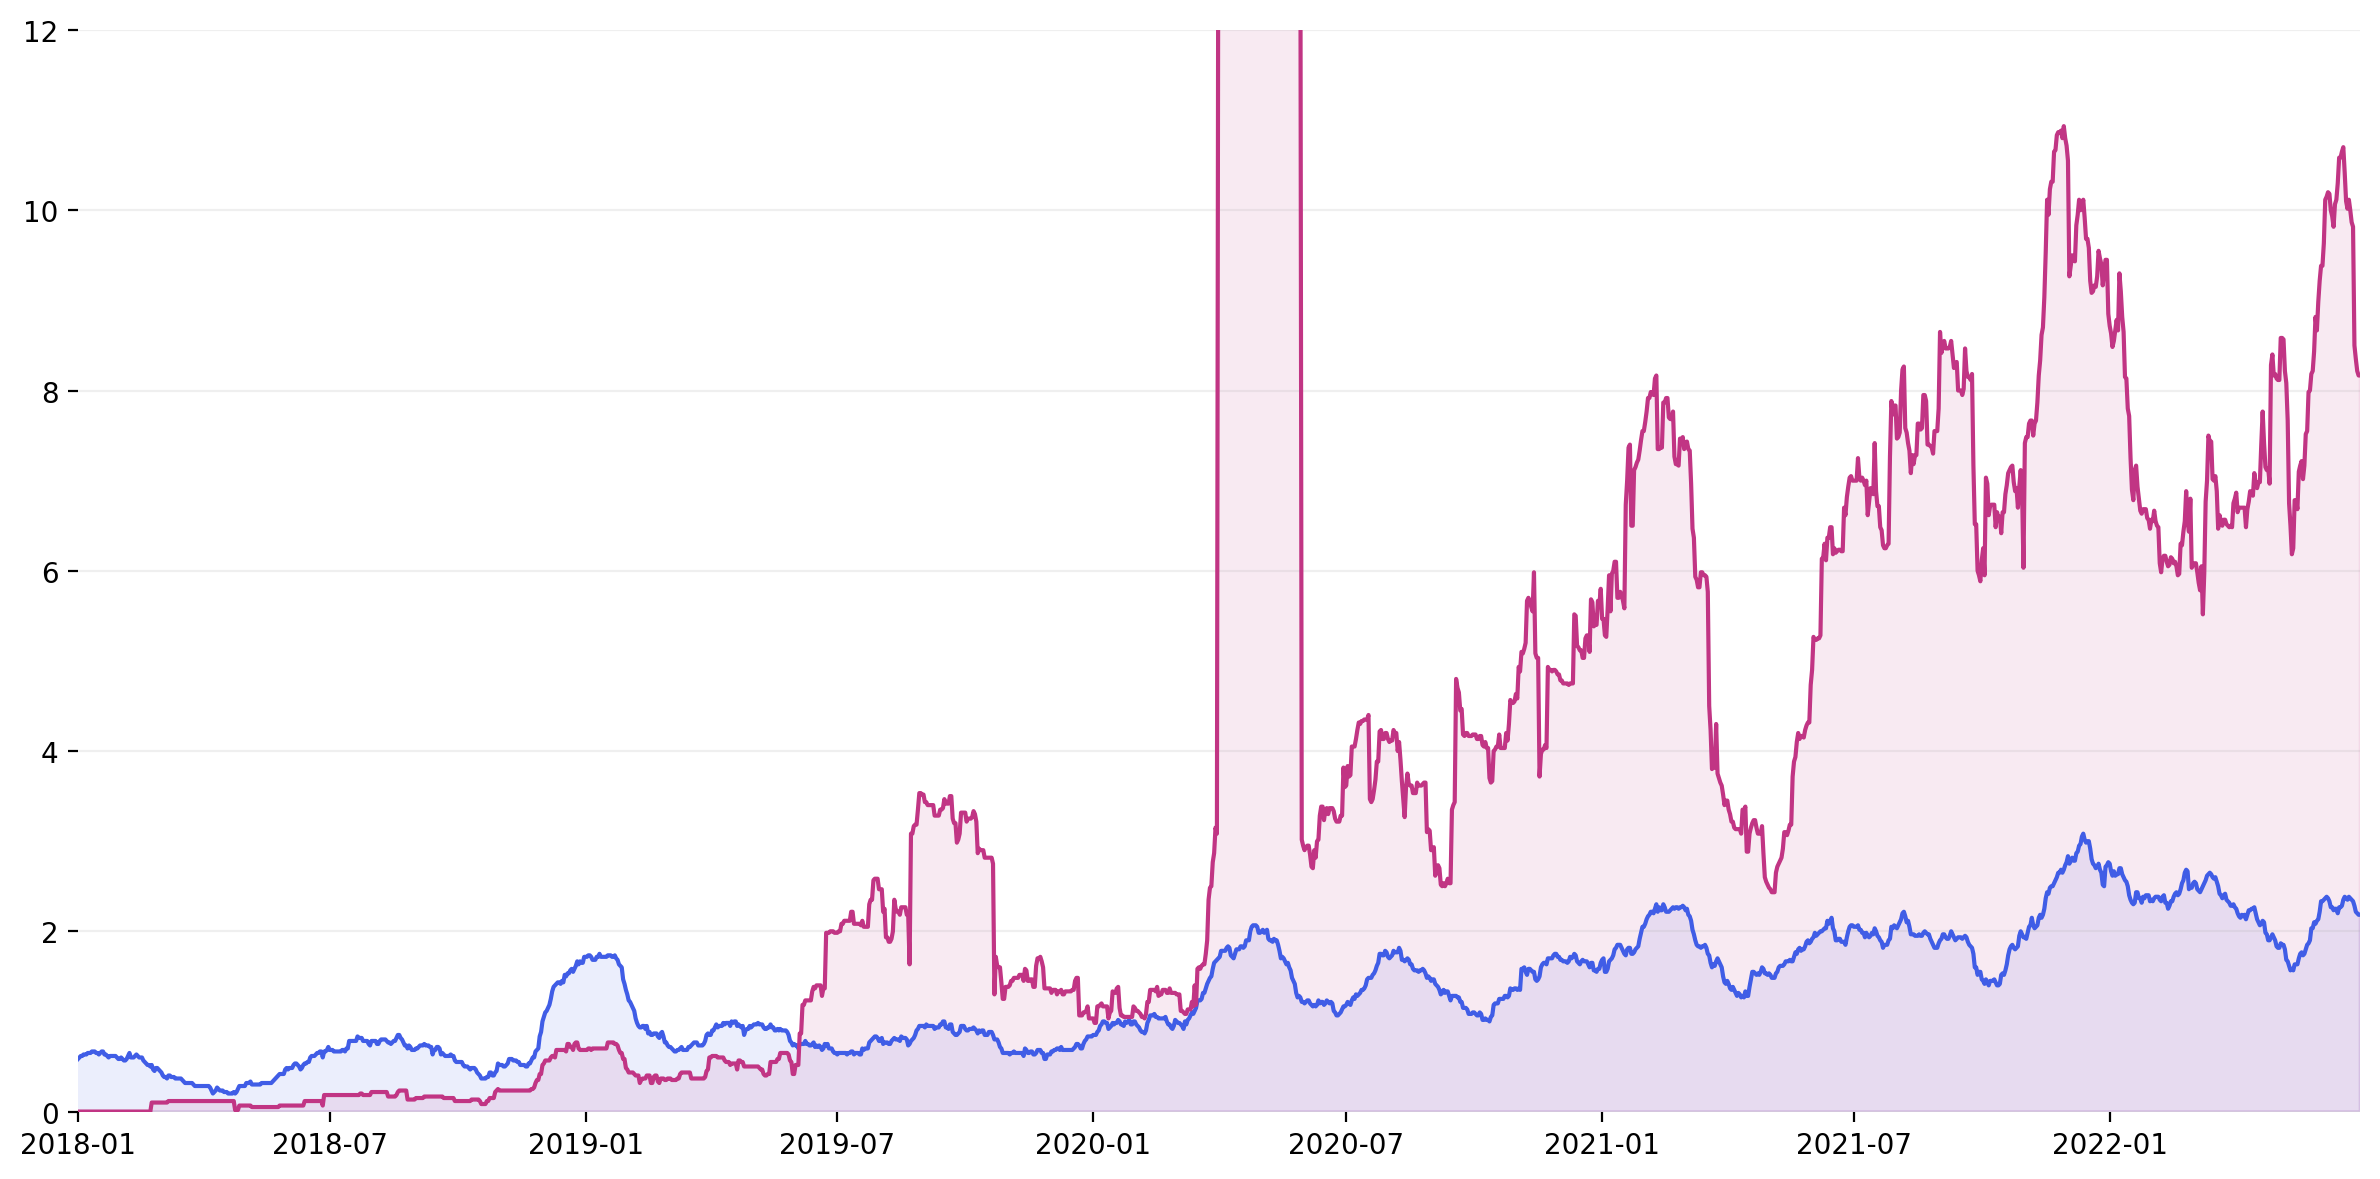

In [137]:
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(total_time_series.index, total_time_series['Tweets'], color='#405DE6', label='Tweets')
plt.fill_between(total_time_series.index, total_time_series['Tweets'], alpha=0.1, color='#405DE6')

plt.plot(total_time_series.index, total_time_series['Likes'], color='#C13584', label='Likes')
plt.fill_between(total_time_series.index, total_time_series['Likes'], alpha=0.1, color='#C13584')

# plt.legend(ncol=3, frameon=False, title='Daily average, last 45 days', loc=(0.3, -0.2))
plt.xlim(datetime(2018, 1, 1), datetime(2022, 6, 30))
plt.ylim(0, 12)
plt.grid(axis='y', alpha=0.2)
plt.box(False)
plt.tight_layout()

In [141]:
t = np.fft.fft(total_time_series[total_time_series.index> datetime(2018,1,1)]['Tweets'])

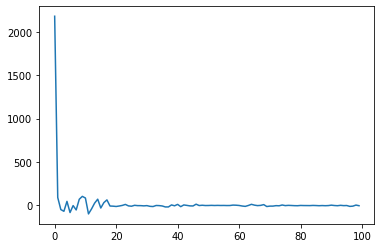

In [146]:
plt.plot(t[:100])